In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [68]:
df_unlabelled = pd.read_csv("../data/all_data.csv")

In [69]:
df_unlabelled

,Timestamp,PID,Process_Name,Power_W,CPU_Usage_%,Mem_Usage_MB
0,2025-12-06T12:46:41.078817+00:00,226,loginwindow,0.0645,4.3,32.679688
1,2025-12-06T12:46:41.078817+00:00,270,PlugInLibraryService,0.0000,0.0,1.574219
2,2025-12-06T12:46:41.078817+00:00,454,distnoted,0.0000,0.0,3.117188
3,2025-12-06T12:46:41.078817+00:00,455,cfprefsd,0.0000,0.0,4.304688
4,2025-12-06T12:46:41.078817+00:00,456,UserEventAgent,0.0000,0.0,5.968750
...,...,...,...,...,...,...
2258,2025-12-06T12:51:28.476268+00:00,94273,com.apple.appkit.xpc.openAndSavePanelService,0.0000,0.0,34.437500
2259,2025-12-06T12:51:28.476268+00:00,94274,QuickLookUIService,0.0000,0.0,10.511719
2260,2025-12-06T12:51:28.476268+00:00,96763,MTLCompilerService,0.0000,0.0,2.710938
2261,2025-12-06T12:51:28.476268+00:00,99510,CSExattrCryptoService,0.0000,0.0,2.140625


In [70]:
df_unlabelled.describe()

,PID,Power_W,CPU_Usage_%,Mem_Usage_MB
count,2263.000000,2263.000000,2263.000000,2263.000000
mean,21577.814406,0.001298,0.110296,15.665402
std,29042.935121,0.031688,2.697781,92.174952
min,226.000000,0.000000,0.000000,0.007812
25%,657.000000,0.000000,0.000000,1.873047
50%,3635.000000,0.000000,0.000000,4.093750
75%,39173.000000,0.000000,0.000000,10.076172
max,99511.000000,1.304325,102.300000,2488.300781


In [71]:
df_unlabelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     2263 non-null   object 
 1   PID           2263 non-null   int64  
 2   Process_Name  2263 non-null   object 
 3   Power_W       2263 non-null   float64
 4   CPU_Usage_%   2263 non-null   float64
 5   Mem_Usage_MB  2263 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 106.2+ KB


In [72]:
df_unlabelled.isna().sum()

Timestamp       0
PID             0
Process_Name    0
Power_W         0
CPU_Usage_%     0
Mem_Usage_MB    0
dtype: int64

In [73]:
df_unlabelled.isnull().sum()

Timestamp       0
PID             0
Process_Name    0
Power_W         0
CPU_Usage_%     0
Mem_Usage_MB    0
dtype: int64

In [74]:
df_unlabelled.ndim

2

In [75]:
df_unlabelled.duplicated().sum()

np.int64(0)

In [76]:
df_unlabelled.nunique()

Timestamp          4
PID              568
Process_Name     421
Power_W           43
CPU_Usage_%       26
Mem_Usage_MB    1317
dtype: int64

In [77]:
df_unlabelled.sample(5)

,Timestamp,PID,Process_Name,Power_W,CPU_Usage_%,Mem_Usage_MB
323,2025-12-06T12:46:41.078817+00:00,9313,MTLCompilerService,0.0,0.0,3.410156
1794,2025-12-06T12:51:28.476268+00:00,567,FamilyControlsAgent,0.0,0.0,0.179688
116,2025-12-06T12:46:41.078817+00:00,599,watchman,0.0,0.0,0.890625
1394,2025-12-06T12:50:05.010062+00:00,1404,localspeechrecognition,0.0,0.0,2.656250
1834,2025-12-06T12:51:28.476268+00:00,634,ContextService,0.0,0.0,3.359375


In [78]:
df_unlabelled.memory_usage

<bound method DataFrame.memory_usage of                              Timestamp    PID  \
0     2025-12-06T12:46:41.078817+00:00    226   
1     2025-12-06T12:46:41.078817+00:00    270   
2     2025-12-06T12:46:41.078817+00:00    454   
3     2025-12-06T12:46:41.078817+00:00    455   
4     2025-12-06T12:46:41.078817+00:00    456   
...                                ...    ...   
2258  2025-12-06T12:51:28.476268+00:00  94273   
2259  2025-12-06T12:51:28.476268+00:00  94274   
2260  2025-12-06T12:51:28.476268+00:00  96763   
2261  2025-12-06T12:51:28.476268+00:00  99510   
2262  2025-12-06T12:51:28.476268+00:00  99511   

                                      Process_Name  Power_W  CPU_Usage_%  \
0                                      loginwindow   0.0645          4.3   
1                             PlugInLibraryService   0.0000          0.0   
2                                        distnoted   0.0000          0.0   
3                                         cfprefsd   0.0000        

In [79]:
df_unlabelled['Timestamp'] = pd.to_datetime(df_unlabelled['Timestamp'])


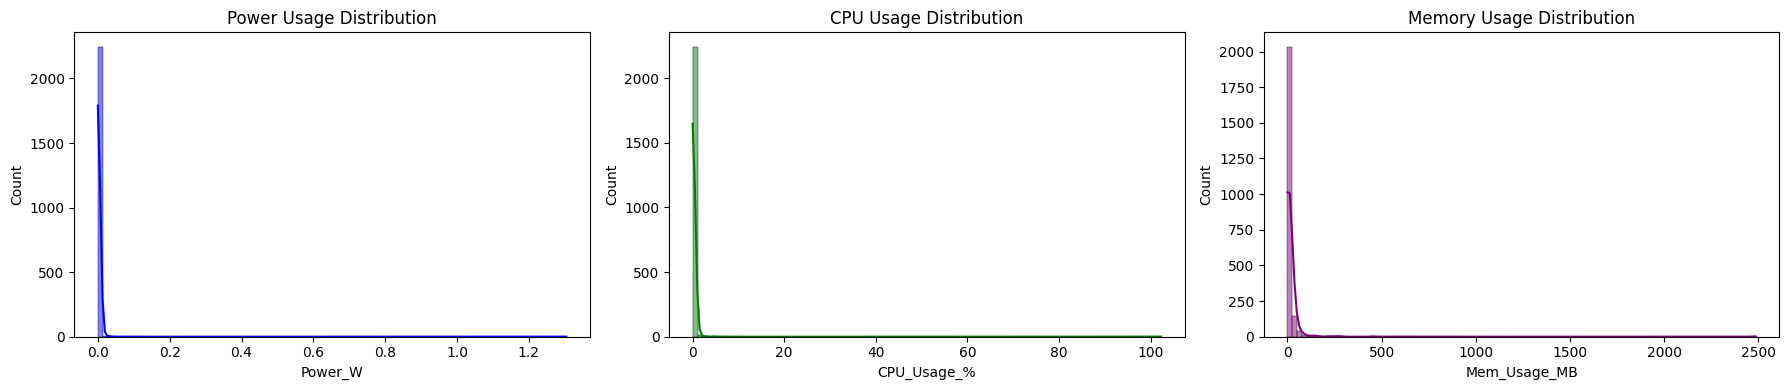

In [80]:
# ==========================================
# 3. FEATURE DISTRIBUTIONS
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18,4))

sns.histplot(df_unlabelled['Power_W'], kde=True, color='blue', ax=axes[0])
axes[0].set_title("Power Usage Distribution")

sns.histplot(df_unlabelled['CPU_Usage_%'], kde=True, color='green', ax=axes[1])
axes[1].set_title("CPU Usage Distribution")

sns.histplot(df_unlabelled['Mem_Usage_MB'], kde=True, color='purple', ax=axes[2])
axes[2].set_title("Memory Usage Distribution")

plt.tight_layout()
plt.show()


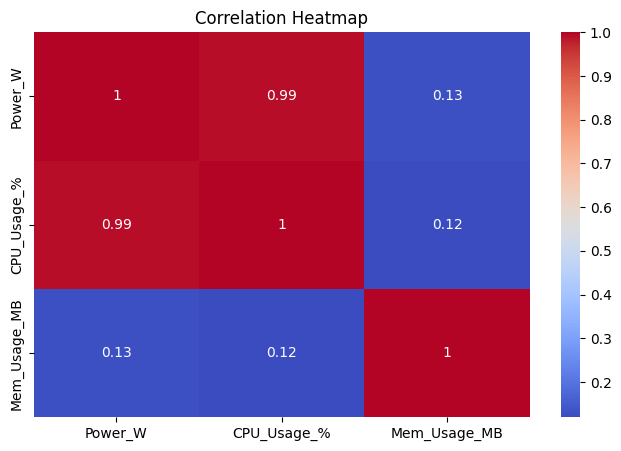

In [81]:
# ==========================================
# 4. CORRELATION HEATMAP
# ==========================================
plt.figure(figsize=(8,5))
sns.heatmap(df_unlabelled[['Power_W','CPU_Usage_%','Mem_Usage_MB']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

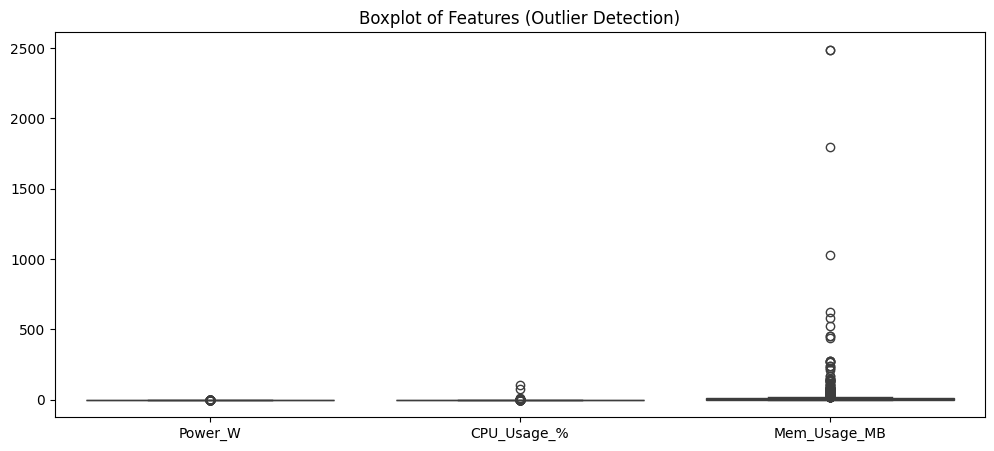

In [82]:
# ==========================================
# 5. BOXPLOTS — CHECK OUTLIERS
# ==========================================
plt.figure(figsize=(12,5))
sns.boxplot(data=df_unlabelled[['Power_W','CPU_Usage_%','Mem_Usage_MB']])
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()




Mean values by process (top 10 by Power_W):
                              Power_W  CPU_Usage_%  Mem_Usage_MB
Process_Name                                                    
accountsd                    0.182160    18.975000     12.379883
Code Helper (Renderer)       0.113214     8.916667    270.787109
BiomeAgent                   0.030375     2.025000     10.356445
loginwindow                  0.027806     1.950000     36.156250
Electron                     0.022800     2.375000    127.469727
DTServiceHub                 0.022324     1.800000      7.833008
Finder                       0.018375     1.225000     78.935547
com.apple.WebKit.Networking  0.009420     0.650000     26.043945
Xcode                        0.008059     0.650000    347.062500
Code Helper (GPU)            0.006945     0.625000     61.448242


/var/folders/fb/c7ny9c1x1cz9sf687_4xwrrm0000gn/T/ipykernel_27918/1095556132.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=process_mean.head(10).reset_index(), x='Process_Name', y='Power_W', palette="viridis")


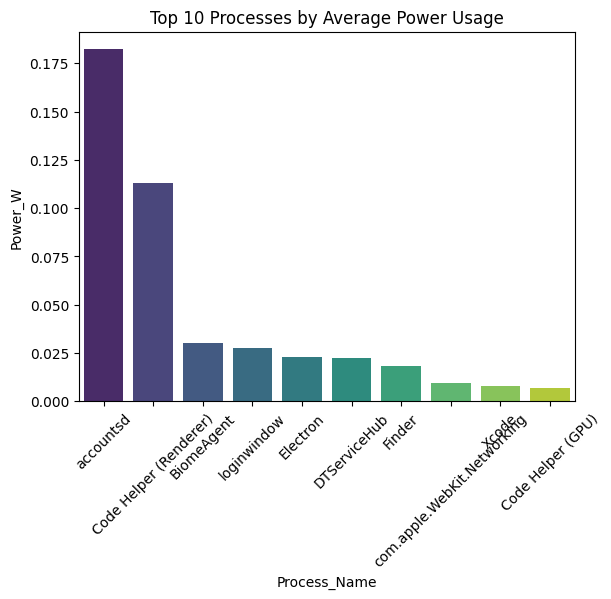

In [83]:
# ==========================================
# 6. PROCESS-WISE ANALYSIS
# ==========================================
process_mean = df_unlabelled.groupby("Process_Name")[["Power_W","CPU_Usage_%","Mem_Usage_MB"]].mean().sort_values("Power_W", ascending=False)
print("\nMean values by process (top 10 by Power_W):")
print(process_mean.head(10))

sns.barplot(data=process_mean.head(10).reset_index(), x='Process_Name', y='Power_W', palette="viridis")
plt.title("Top 10 Processes by Average Power Usage")
plt.xticks(rotation=45)
plt.show()

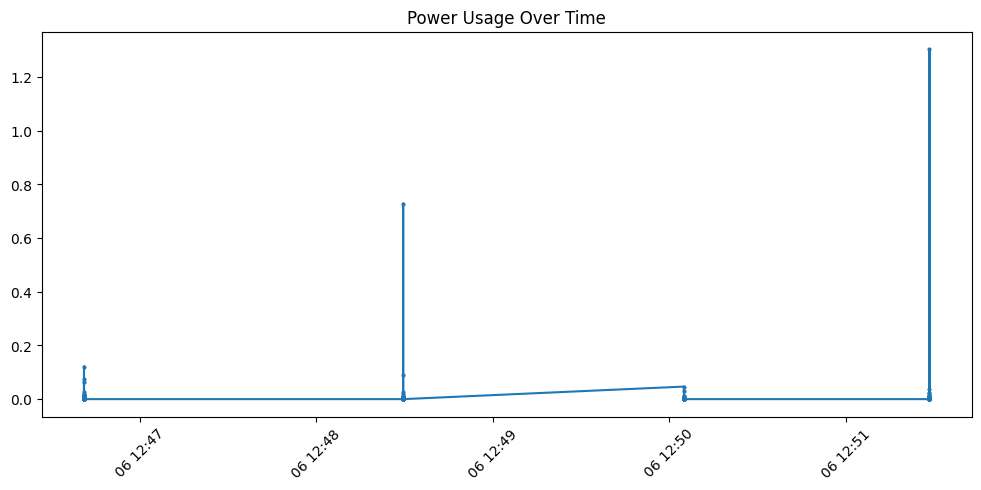

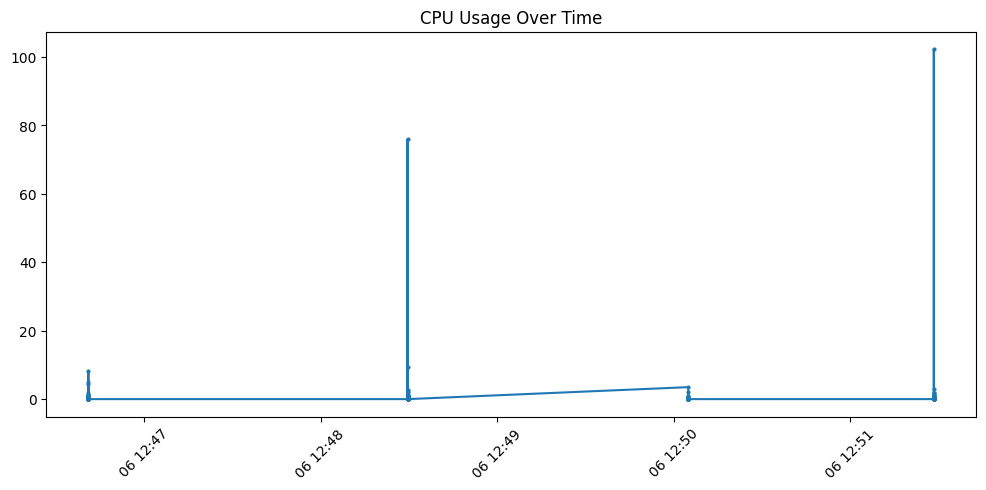

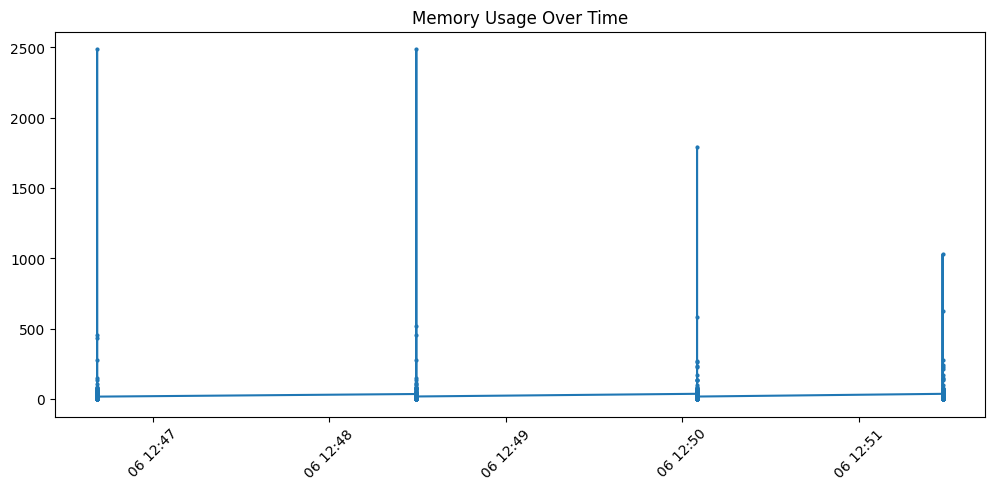

In [84]:
# ==========================================
# 7. TIME SERIES TREND
# ==========================================
df_unlabelled['Timestamp'] = pd.to_datetime(df_unlabelled['Timestamp'])

plt.figure(figsize=(12,5))
plt.plot(df_unlabelled['Timestamp'], df_unlabelled['Power_W'], marker='o', linestyle='-', markersize=2)
plt.title("Power Usage Over Time")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df_unlabelled['Timestamp'], df_unlabelled['CPU_Usage_%'], marker='o', linestyle='-', markersize=2)
plt.title("CPU Usage Over Time")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(df_unlabelled['Timestamp'], df_unlabelled['Mem_Usage_MB'], marker='o', linestyle='-', markersize=2)
plt.title("Memory Usage Over Time")
plt.xticks(rotation=45)
plt.show()



In [85]:
# ==========================================
# 8. OUTLIER DETECTION
# ==========================================
z_scores = np.abs(stats.zscore(df_unlabelled[['Power_W','CPU_Usage_%','Mem_Usage_MB']]))
outliers = (z_scores > 3).any(axis=1)
print(f"\nNumber of potential outliers detected: {outliers.sum()}")




Number of potential outliers detected: 13


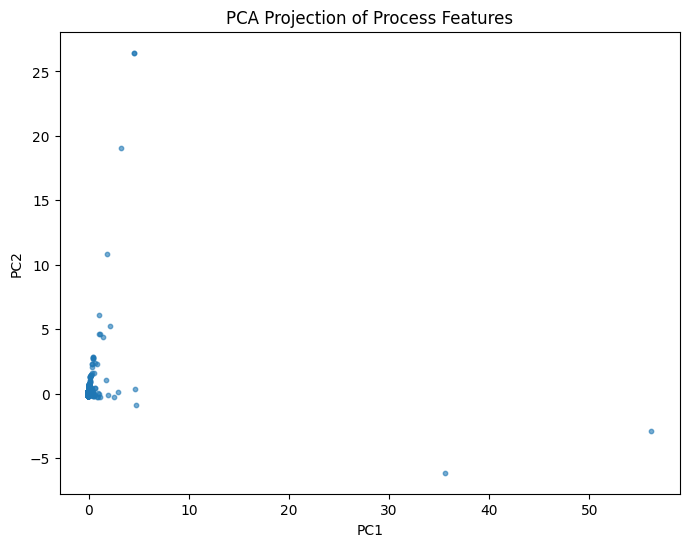

In [86]:
# ==========================================
# 9. PCA FOR VISUALIZATION
# ==========================================
features = ['Power_W','CPU_Usage_%','Mem_Usage_MB']
scaled_features = StandardScaler().fit_transform(df_unlabelled[features])

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], s=10, alpha=0.6)
plt.title("PCA Projection of Process Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

